### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.

In [1]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>
#include <unistd.h>
#include <sys/times.h>


void measure_time(int number){
    clock_t clk;
    double time_taken;

    double c[(number * 2)];
    double result = 0;
    gsl_vector *a = gsl_vector_alloc(number);
    gsl_vector *matrix_result = gsl_vector_alloc(2);

    for(int i = 0; i < number; i++){
        gsl_vector_set(a, i, 1);
    }

    for(int i = 0; i < number * 2; i++){
        c[i] = 1;
    }
    gsl_matrix_view C = gsl_matrix_view_array(c, 2, number);

    clk = clock();
    gsl_blas_ddot(a, a, &result);
    clk = clock() - clk;
    time_taken = (((double) clk)/CLOCKS_PER_SEC)*1000;
    printf("%f;", time_taken);

    clk = clock();
    gsl_blas_dgemv(CblasNoTrans, 1.0, &C.matrix, a, 0.0, matrix_result);
    clk = clock() - clk;
    time_taken = (((double) clk)/CLOCKS_PER_SEC)*1000;
    if(number == 500000){
        printf("%f\n", time_taken);
    }
    else printf("%f;", time_taken);

    gsl_vector_free(a);
    gsl_vector_free(matrix_result);

}

int main(void){
    for(int i = 10; i<100 ;i = i+10){
        printf("\"ddot %i\";\"dgemv %i;\"",i,i);
    }
    for(int i = 100; i < 1000; i = i+100){
        printf("\"ddot %i\";\"dgemv %i;\"",i,i);
    }
    for(int i = 1000; i < 10000; i = i+1000){
        printf("\"ddot %i\";\"dgemv %i;\"",i,i);
    }
    for(int i = 10000; i<=500000; i = i + 10000){
        if(i == 500000) {
            printf("\"ddot %i\";\"dgemv %i\"\n",i,i);
        }
        else printf("\"ddot %i\";\"dgemv %i;\"",i,i);
    }

    for(int k = 0; k<10; k++){

        for(int i = 10; i<100 ;i = i+10){
            measure_time(i);
        }
        for(int i = 100; i < 1000; i = i+100){
            measure_time(i);
        }
        for(int i = 1000; i<10000; i = i + 1000){
            measure_time(i);
        }

        for(int i = 10000; i<=500000; i = i + 10000){
            measure_time(i);
        }
    }


    return 0;
}

LoadError: syntax: extra token "measure_time" after end of expression

In [26]:
using CSV
input="blas1.csv"
mydata=CSV.read(input, delim=";")

,ddot 10,dgemv 10,ddot 20,dgemv 20,ddot 30,dgemv 30,ddot 40,dgemv 40,ddot 50,dgemv 50,ddot 60,dgemv 60,ddot 70,dgemv 70,ddot 80,dgemv 80,ddot 90,dgemv 90,ddot 100,dgemv 100,ddot 200,dgemv 200,ddot 300,dgemv 300,ddot 400,dgemv 400,ddot 500,dgemv 500,ddot 600,dgemv 600,ddot 700,dgemv 700,ddot 800,dgemv 800,ddot 900,dgemv 900,ddot 1000,dgemv 1000,ddot 2000,dgemv 2000,ddot 3000,dgemv 3000,ddot 4000,dgemv 4000,ddot 5000,dgemv 5000,ddot 6000,dgemv 6000,ddot 7000,dgemv 7000,ddot 8000,dgemv 8000,ddot 9000,dgemv 9000,ddot 10000,dgemv 10000,ddot 20000,dgemv 20000,ddot 30000,dgemv 30000,ddot 40000,dgemv 40000,ddot 50000,dgemv 50000,ddot 60000,dgemv 60000,ddot 70000,dgemv 70000,ddot 80000,dgemv 80000,ddot 90000,dgemv 90000,ddot 100000,dgemv 100000,ddot 110000,dgemv 110000,ddot 120000,dgemv 120000,ddot 130000,dgemv 130000,ddot 140000,dgemv 140000,ddot 150000,dgemv 150000,ddot 160000,dgemv 160000,ddot 170000,dgemv 170000,ddot 180000,dgemv 180000,ddot 190000,dgemv 190000,ddot 200000,dgemv 200000,ddot 210000,dgemv 210000,ddot 220000,dgemv 220000,ddot 230000,dgemv 230000,ddot 240000,dgemv 240000,ddot 250000,dgemv 250000,ddot 260000,dgemv 260000,ddot 270000,dgemv 270000,ddot 280000,dgemv 280000,ddot 290000,dgemv 290000,ddot 300000,dgemv 300000,ddot 310000,dgemv 310000,ddot 320000,dgemv 320000,ddot 330000,dgemv 330000,ddot 340000,dgemv 340000,ddot 350000,dgemv 350000,ddot 360000,dgemv 360000,ddot 370000,dgemv 370000,ddot 380000,dgemv 380000,ddot 390000,dgemv 390000,ddot 400000,dgemv 400000,ddot 410000,dgemv 410000,ddot 420000,dgemv 420000,ddot 430000,dgemv 430000,ddot 440000,dgemv 440000,ddot 450000,dgemv 450000,ddot 460000,dgemv 460000,ddot 470000,dgemv 470000,ddot 480000,dgemv 480000,ddot 490000,dgemv 490000,ddot 500000,dgemv 500000
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,0.005,0.003,0.001,0.002,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.001,0.001,0.001,0.002,0.001,0.001,0.002,0.002,0.003,0.002,0.003,0.002,0.004,0.002,0.005,0.003,0.005,0.004,0.005,0.003,0.006,0.004,0.006,0.006,0.012,0.009,0.016,0.012,0.021,0.014,0.027,0.016,0.031,0.019,0.036,0.021,0.041,0.024,0.046,0.026,0.051,0.053,0.118,0.078,0.152,0.103,0.202,0.128,0.253,0.187,0.36,0.115,0.174,0.114,0.231,0.149,0.493,0.103,0.204,0.13,0.24,0.121,0.252,0.135,0.279,0.173,0.408,0.283,1.944,0.172,0.404,0.176,0.478,0.188,0.43,0.2,0.467,0.215,0.518,0.293,0.555,0.287,0.638,0.249,0.649,0.259,0.639,0.271,0.671,0.284,0.708,0.294,0.74,0.317,0.798,0.33,0.972,0.439,0.903,0.343,0.89,0.354,0.98,0.445,0.994,0.382,1.052,0.396,1.103,0.597,2.437,0.597,1.037,0.669,2.783,0.589,1.138,0.564,1.142,0.485,1.271,0.474,1.206,0.483,1.244,0.495,1.285,0.502,1.325,0.516,1.324

In [27]:
using DataFrames
described = describe(mydata, stats=:all)

,variable,mean,std,min,q25,median,q75,max,nunique,nmissing,first,last,eltype
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Nothing,Int64,Float64,Float64,DataType
1,ddot 10,0.0013,0.00141814,0.0,0.001,0.001,0.001,0.005,,0,0.005,0.0,Float64
2,dgemv 10,0.0013,0.000674949,0.001,0.001,0.001,0.001,0.003,,0,0.003,0.001,Float64
3,ddot 20,0.0018,0.00361478,0.0,0.00025,0.001,0.001,0.012,,0,0.001,0.001,Float64
4,dgemv 20,0.0005,0.000707107,0.0,0.0,0.0,0.001,0.002,,0,0.002,0.0,Float64
5,ddot 30,0.0005,0.000527046,0.0,0.0,0.0005,0.001,0.001,,0,0.001,0.0,Float64
6,dgemv 30,0.0008,0.000421637,0.0,0.001,0.001,0.001,0.001,,0,0.001,0.001,Float64
7,ddot 40,0.0005,0.000707107,0.0,0.0,0.0,0.001,0.002,,0,0.002,0.0,Float64
8,dgemv 40,0.001,0.000471405,0.0,0.001,0.001,0.001,0.002,,0,0.002,0.001,Float64
9,ddot 50,0.0016,0.00298887,0.0,0.00025,0.001,0.001,0.01,,0,0.001,0.001,Float64


In [28]:
toPlot = DataFrame(Symbols=described[:variable], Means=described[:mean], Stds = described[:std],e=map(x->x%2,(1:154)))

,Symbols,Means,Stds,e
,Symbol,Float64,Float64,Int64
1,ddot 10,0.0013,0.00141814,1
2,dgemv 10,0.0013,0.000674949,0
3,ddot 20,0.0018,0.00361478,1
4,dgemv 20,0.0005,0.000707107,0
5,ddot 30,0.0005,0.000527046,1
6,dgemv 30,0.0008,0.000421637,0
7,ddot 40,0.0005,0.000707107,1
8,dgemv 40,0.001,0.000471405,0
9,ddot 50,0.0016,0.00298887,1


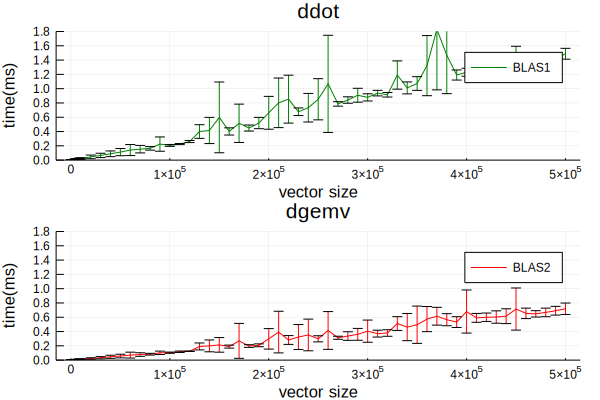

In [29]:
using Plots
Nums = [10, 10,20, 20,30, 30,40, 40,50, 50,60, 60,70, 70,80, 80,90, 90,100, 100,200, 200,300, 300,400, 400,500, 500,600, 600,700, 700,800, 800,900, 900,1000, 1000,2000, 2000,3000, 3000,4000, 4000,5000, 5000,6000, 6000,7000, 7000,8000, 8000,9000, 9000,10000, 10000,20000, 20000,30000, 30000,40000, 40000,50000, 50000,60000, 60000,70000, 70000,80000, 80000,90000, 90000,100000, 100000,110000, 110000,120000, 120000,130000, 130000,140000, 140000,150000, 150000,160000, 160000,170000, 170000,180000, 180000,190000, 190000,200000, 200000,210000, 210000,220000, 220000,230000, 230000,240000, 240000,250000, 250000,260000, 260000,270000, 270000,280000, 280000, 290000, 290000, 300000, 300000, 310000, 310000, 320000, 320000, 330000, 330000, 340000, 340000, 350000, 350000, 360000, 360000, 370000, 370000, 380000, 380000, 390000, 390000, 400000, 400000, 410000, 410000, 420000, 420000, 430000, 430000, 440000, 440000, 450000, 450000, 460000, 460000, 470000, 470000, 480000, 480000, 490000, 490000, 500000, 500000]
plot(Nums,toPlot[:2], group = toPlot[:e], ylims=(0, 1.8), yticks=0.0:0.2:1.8, layout=grid(2,1), yerr = toPlot[:Stds], colour = [:green :red],
    title = ["ddot" "dgemv"], label=["BLAS1" "BLAS2"], xlabel = "vector size", ylabel="time(ms)")